# LINEAR REGRESSION

### What is Linear Regression?

>Linear Regression is a most commonly used machine learning technique to predict a target value based upon the relationship between the target value and multiple (or single) independent predictor features.

In [1]:
# importing the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston

# Loading the boston dataset and printing first five observations
boston = load_boston()
print(boston.data.shape)       
print(boston.feature_names)  # Column names
print(boston.DESCR)        
df = pd.DataFrame(boston.data)
print(df.head(5))

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to 

In [2]:
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
# the target variable
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [4]:
df['PRICE'] = boston.target
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


>PRICE is our target variable (predicates/dependent variable)
All other variables are predictor features or also called as predictors or independent variables

In [5]:
# checking for any missing value
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [6]:
# Now lets split our dataframe into training (X) and testing(y) sets

X = df.drop('PRICE', axis = 1)
              
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df.PRICE, test_size = 0.33, random_state = 42) 

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [14]:
# Lets fit linear regression to make the necessary prediction of the data
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)
pred_test = lm.predict(X_test)

In [24]:
# Lets see the best fit line between predicted price and actual price in a scatter plot
temp_df = pd.DataFrame({'y_test' : y_test, 'pred_test' : pred_test}, columns = ['y_test', 'pred_test'])
temp_df.head()

,y_test,pred_test
173,23.6,28.534695
274,32.4,36.618701
491,13.6,15.637511
72,22.8,25.501450
452,16.1,18.709673


Text(10.049999999999997, 0.5, 'Predicted Price')

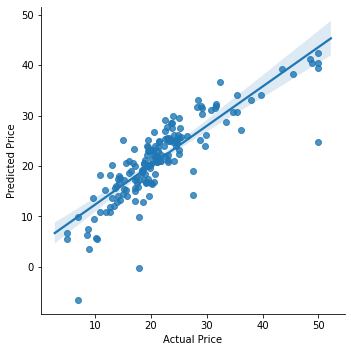

In [26]:
import seaborn as sns
sns.lmplot('y_test', 'pred_test', data = temp_df)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

In [28]:
#  The importance of each feature in predicting the price can be calculated using lm.coef_. 
coeff_df = pd.DataFrame(X_train.columns, lm.coef_)
print(coeff_df)
mse = sklearn.metrics.mean_squared_error(y_test, pred_test)
print('The Mean Squared Error is : ',mse)

                  0
-0.128750      CRIM
 0.037823        ZN
 0.058211     INDUS
 3.238668      CHAS
-16.169812      NOX
 3.902051        RM
-0.012851       AGE
-1.422224       DIS
 0.234854       RAD
-0.008213       TAX
-0.928722   PTRATIO
 0.011770         B
-0.547566     LSTAT
The Mean Squared Error is :  20.724023437339813


### What are the assumptions of Linear Regression?

***

##### Linear Relationship

>First for a linear regression relationship between dependent and target variable should be Linear.
The linearity assumption can be checked from a scatter plot.
One must also check for outliers as linear regression is highly susceptible of outliers. 
Outliers can be checked by boxplot.

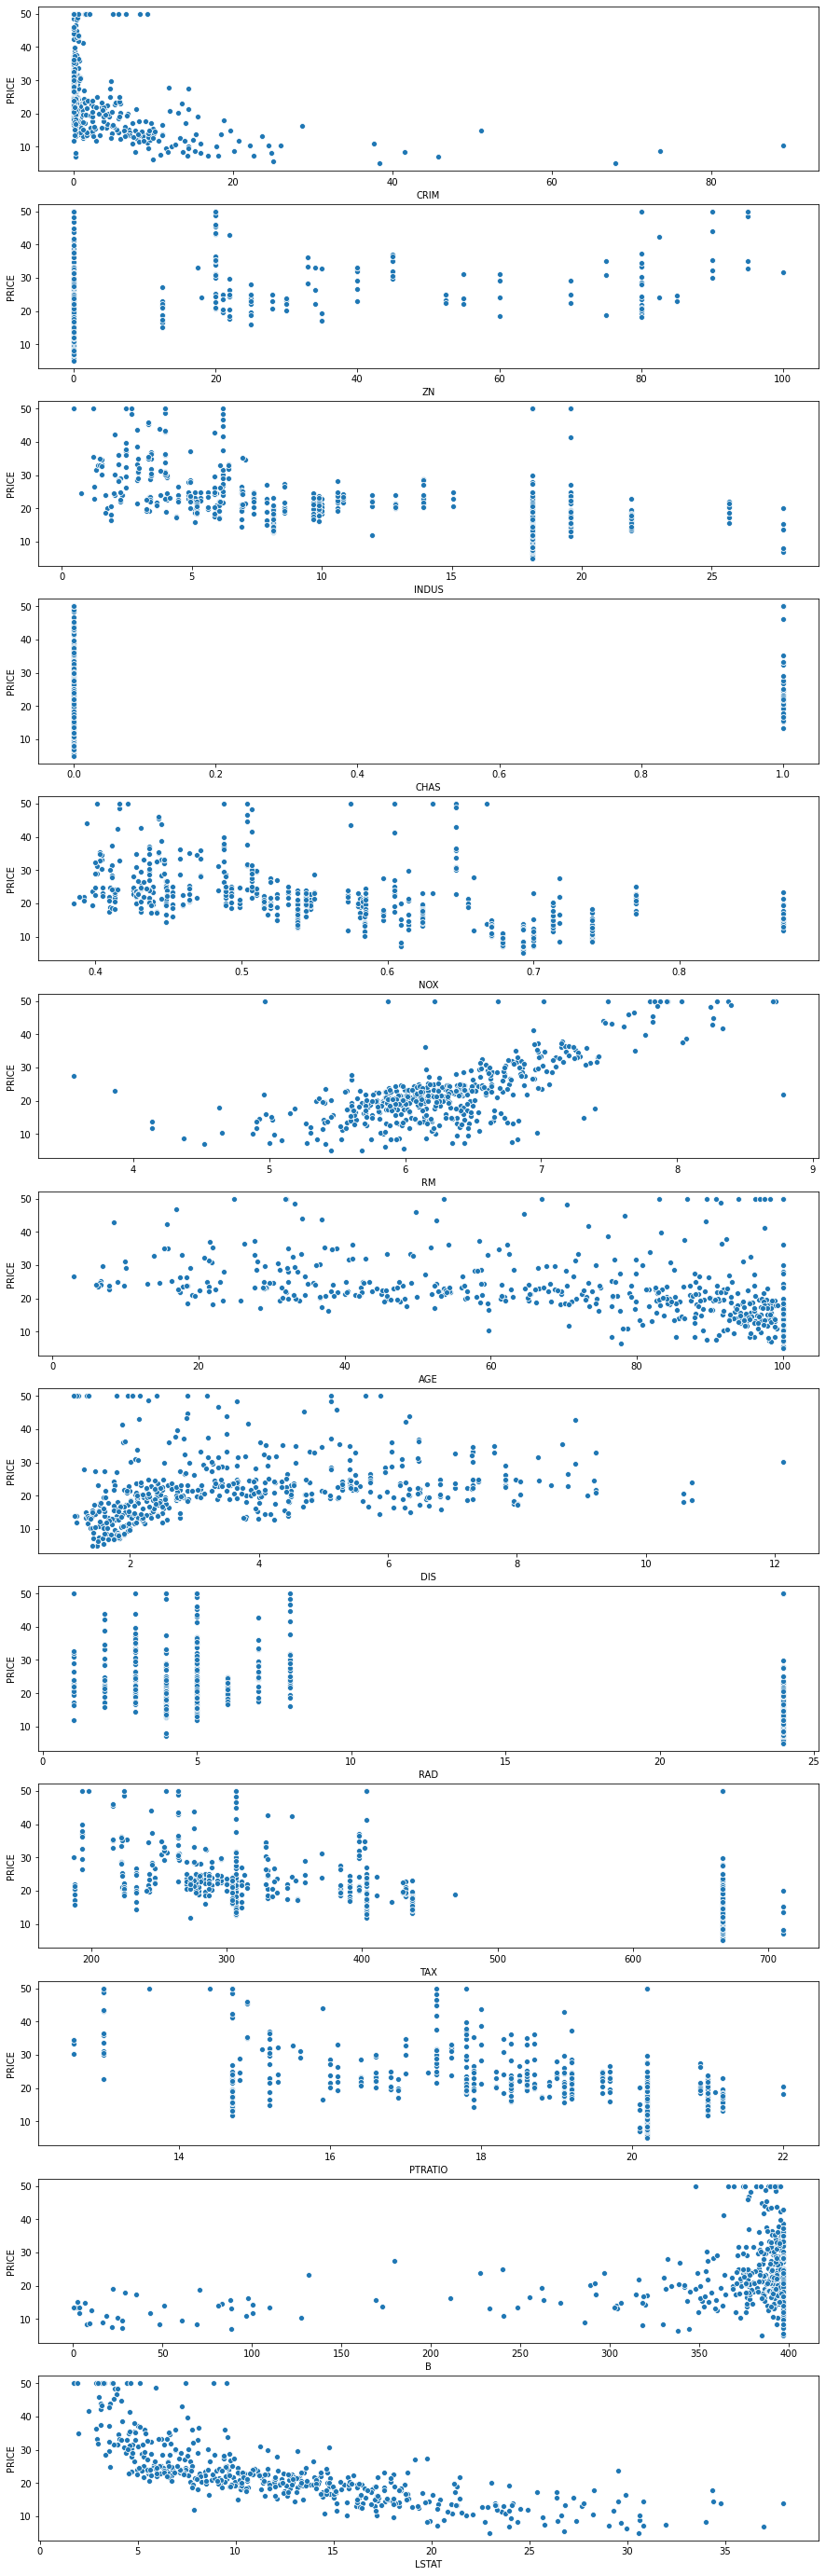

In [43]:
cols_to_plot = X.columns
fig, ax = plt.subplots(nrows = len(cols_to_plot), ncols = 1, figsize = (15,50))
for i, col in enumerate(cols_to_plot):
    plt.subplot(ax[i])
    sns.scatterplot(x = df[col], y = df['PRICE'])
    plt.tight_layout

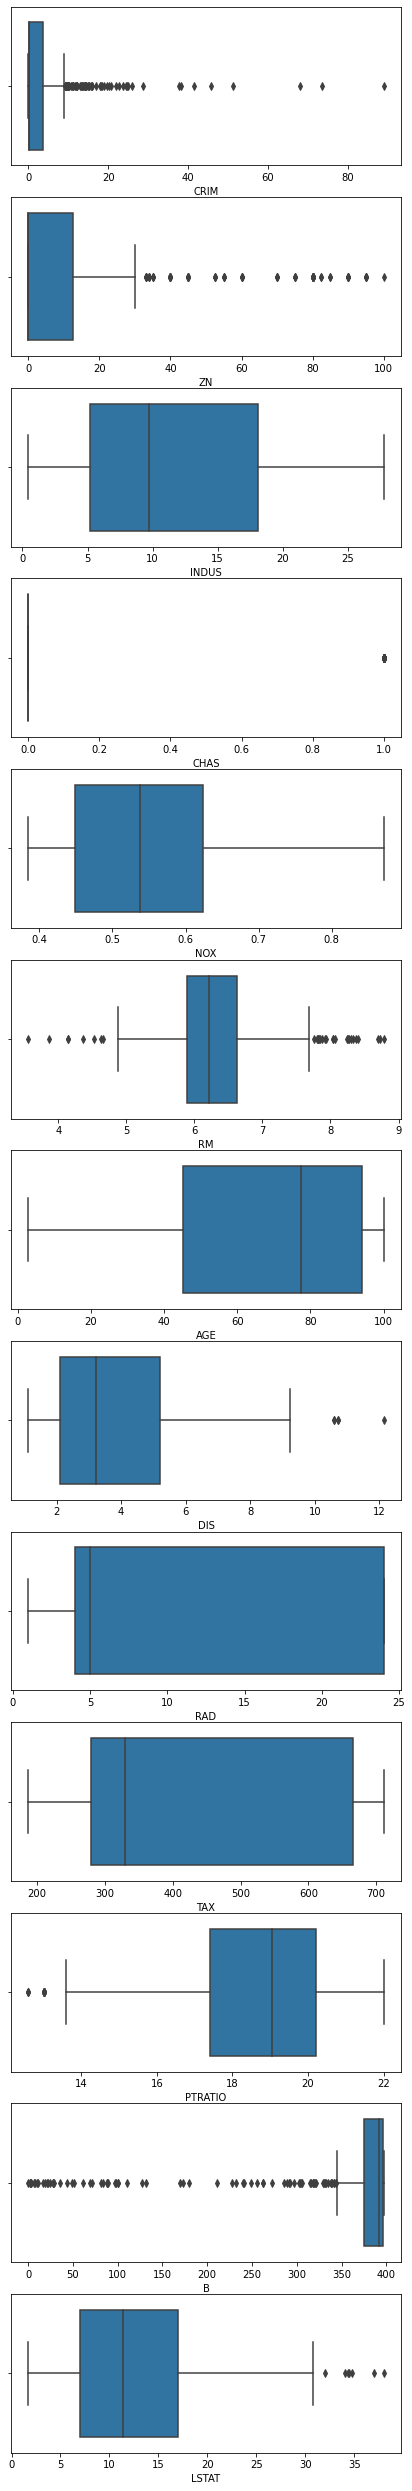

In [53]:
cols_to_plot = X.columns
fig, ax = plt.subplots(nrows = len(cols_to_plot), ncols = 1, figsize = (7,45))
for i, col in enumerate(cols_to_plot):
    plt.subplot(ax[i])
    sns.boxplot(df[col])
    plt.tight_layout

>It can be seen as many predictors contain outliers

In [55]:
# How do we detect these outliers.
# Let's work with one variable, for example - RM

from numpy import percentile
#calculating IQR
q25, q75 = percentile(df.RM,25), percentile(df.RM,75)
IQR = q75 - q25
#calculating the outliers cutoff
cutoff = IQR* 1.5
lower, upper = q25 - cutoff, q75 + cutoff
#identifying outliers
outliers = [x for x in df.RM if x < lower or x > upper]
print("No. of outliers in the income are: {}".format(len(outliers)))

No. of outliers in the income are: 30


In [64]:
# which all observations are outliers in RM?
df[df['RM'].isin(outliers)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
97,0.12083,0.0,2.89,0.0,0.4450,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21,38.7
98,0.08187,0.0,2.89,0.0,0.4450,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57,43.8
162,1.83377,0.0,19.58,1.0,0.6050,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1.0,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0.0,0.6050,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,50.0
180,0.06588,0.0,2.46,0.0,0.4880,7.765,83.3,2.7410,3.0,193.0,17.8,395.56,7.56,39.8
186,0.05602,0.0,2.46,0.0,0.4880,7.831,53.6,3.1992,3.0,193.0,17.8,392.63,4.45,50.0
195,0.01381,80.0,0.46,0.0,0.4220,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,50.0
203,0.03510,95.0,2.68,0.0,0.4161,7.853,33.2,5.1180,4.0,224.0,14.7,392.78,3.81,48.5
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88,50.0


***

##### Multivariate Normality

Text(0.5, 1.0, 'Q-Q Plot')

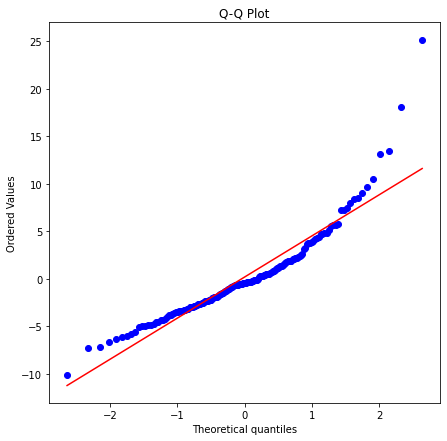

In [89]:
from scipy import stats
residuals = y_test - pred_test.reshape(-1)
plt.figure(figsize = (7,7))
stats.probplot(residuals, dist = "norm", plot = plt)
plt.title("Q-Q Plot")

In [94]:
# For the given sample dataset the assumption of normality can also be validated using the Shapiro-Wilk test.
shapiro_score = stats.shapiro(residuals) #(0.8892614245414734, 7.822198999640761e-10)
print("test statistics : ", shapiro_score[0], '\np-value : {:.16f}'.format(float(shapiro_score[1])) )

test statistics :  0.8892614245414734 
p-value : 0.0000000007822199


>For a significance level of 0.05, the p-value obtained from the Shapiro-Wilk test suggests that the model abides by the assumption of normality since the p-value is greater than the chosen significance level.

<hr>

##### Validating the linearity assumptions

In [82]:
print('intercept is : ',lm.intercept_, '\nCoefficient is : ',lm.coef_[0])

intercept is :  33.33497575563585 
Coefficient is :  -0.12874971839943297


Text(0.5, 0, 'Fitted Value')

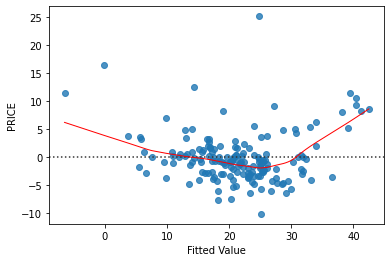

In [86]:
sns.residplot(pred_test.reshape(-1), y_test, lowess = True, line_kws = {'color' : 'red', 'lw' : 1, 'alpha' : 1})
plt.xlabel('Fitted Value')

>In general, it can also be observed from the residuals vs fitted values plot that, observations that lie close to the horizontal line (residuals = 0 ) are predicted with higher accuracy whilst that below the horizontal line are overpredicted. That is the predicted value is higher than the observed value. On the other hand, the observations that lie above the horizontal line are underpredicted i.e. the predicted value is lower than the observed value.

***

##### Multicollinearity

>Multiple regression assumes that the independent variables are not highly correlated with each other. 

>1) Correlation matrix – When computing a matrix of Pearson’s bivariate correlations among all independent variables, the magnitude of the correlation coefficients should be less than .80.

>2) Variance Inflation Factor (VIF) – The VIFs of the linear regression indicate the degree that the variances in the regression estimates are increased due to multicollinearity. VIF values higher than 10 indicate that multicollinearity is a problem.

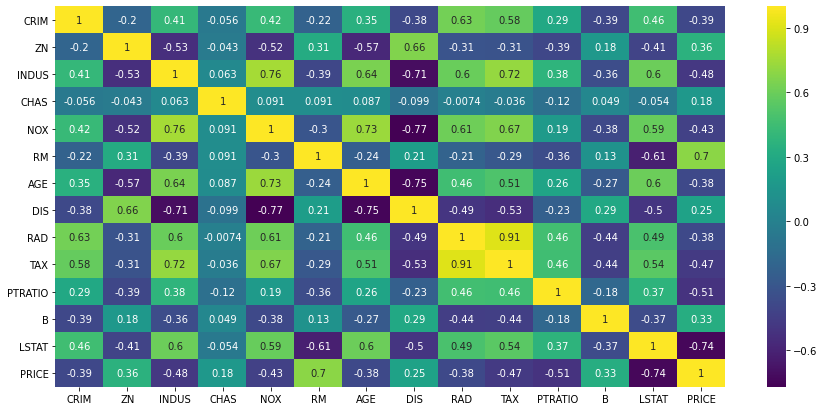

In [74]:
# Correlation matrix
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, cmap = plt.cm.viridis)

In [75]:
# lets see correlation w.r.t dependent variable - PRICE
df.corr().loc['PRICE']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
PRICE      1.000000
Name: PRICE, dtype: float64

In [76]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Attirbutes']=df.columns

In [77]:
vif

,VIF Factor,Attirbutes
0,2.131404,CRIM
1,2.910004,ZN
2,14.485874,INDUS
3,1.176266,CHAS
4,74.004269,NOX
5,136.101743,RM
6,21.398863,AGE
7,15.430455,DIS
8,15.369980,RAD
9,61.939713,TAX


***

##### Homoscedasticity

>In statistics, a sequence or a vector of random variables is homoscedastic if all random variables in the sequence or vector have the same finite variance. This is also known as homogeneity of variance
The linear regression model is said to abide by the homoscedasticity assumption if there is no specific pattern observed in the scale-location plot. The scale-location plot of the best fit model for the computer repairs data set is as shown below.

Text(0.5, 0, 'Fitted Value')

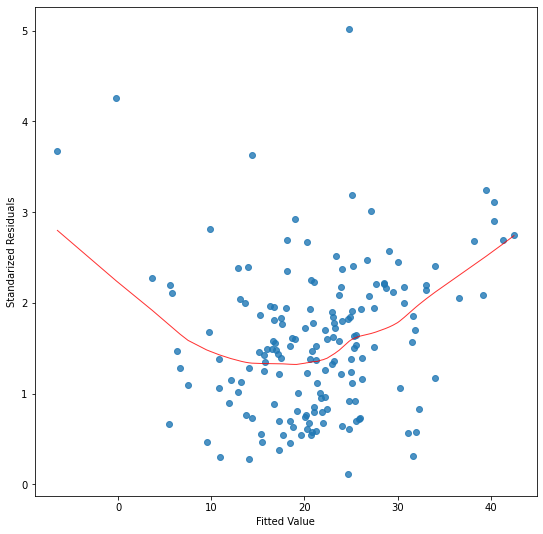

In [96]:
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(residuals))
plt.figure(figsize = (9,9))
sns.regplot(pred_test.reshape(-1), model_norm_residuals_abs_sqrt, scatter = True, lowess = True, line_kws = {'color' : 'red', 'lw' : 1, 'alpha' : 0.8})
plt.ylabel('Standarized Residuals')
plt.xlabel('Fitted Value')

>It can be observed in the above plot that there is no specific pattern. In general, the homoscedasticity is said to be violated if:
1. The residuals seem to increase or decrease in average magnitude with the fitted values, it is an indication that the variance of the residuals is not constant.
2. The points in the plot lie on a curve around zero, rather than fluctuating randomly.
3. A few points in the plot lie a long way from the rest of the points.

***

### Simple Linear Regression

In [13]:
computers = pd.read_csv("computers.csv")
computers.head()

,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X=computers.loc[:,["Units"]], y=computers.loc[:,["Minutes"]])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
predictions = model.predict(computers.loc[:,["Units"]])
predictions.shape

(14, 1)

In [18]:
# Total Sum of Squares
SST = sum((computers.Minutes.mean() - computers.Minutes)**2 )
SST

27768.357142857145

In [19]:
residuals = computers["Minutes"] - predictions.reshape(-1)

In [20]:
# Error Sum of Squares
SSE = sum(residuals**2)
SSE

348.848370927318

In [21]:
# Regression Sum of Squares
SSR = SST - SSE
SSR

27419.508771929828

##### Coefficient of Determination (R2)

In [22]:
Rsq = SSR/SST
Rsq

0.9874371980620736

In [23]:
Rsq1 = model.score(computers[["Units"]],computers["Minutes"])
Rsq1

0.9874371980620736

>R2 can take values in the range 0 and 1. The higher the value of R2, the more useful is the model.

##### using statsmodel

In [24]:
import statsmodels.api as sm
X = sm.add_constant(computers[["Units"]])
y = computers["Minutes"]
model = sm.OLS(y,X).fit()  #Fitting a regression model 

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [25]:
model.summary()

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Minutes   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           8.92e-13
Time:                        21:53:44   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1617      3.355      1.240      0.239      -3.148      11.472
Units         15.5088      0.505     30.712      0.000      14.409      16.609
==============================================================================
Omnibus:                        0.746   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.624
Skew:                          -0.069   Prob(JB):                        0.732
Kurtosis:                       1.975   Cond. No.                         15.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

>Here, the Ordinary Least Square(OLS) method is used for fitting a regression model

>The intercept (ß0) for the obtained linear regression model is 4.1617, whereas ß1 is approximately 15.508.
Similarly, the R2 value and Adjusted R2 value are 0.987 and 0.986 respectively.

>The adjusted R-squared also indicates the usefulness of the regression model. The adjusted R-squared value takes into account the number of predictor variables as compared to multiple R-squared. Adjusted R-squared is discussed in detail in the multiple linear regression section

***

### Cautions with correlation

> 1. Correlation is not the right measure for finding association for non-linear relationships. To determine whether two variables may be linearly related, a scatter plot can be used.
2. Pearson correlation can be affected by outliers.  A box plot can be used to identify the presence of outliers. The effect of outliers is minimal for Spearman correlation therefore, if outliers cannot be manipulated or eliminated from the analysis with proper justification, Spearman correlation is preferred.
3. A correlation value close to 0 indicates that the variables are not linearly associated, however these variables may still be related. Thus it is advised to plot the data.
4. **Correlation does not imply causation** i.e. based on the value of correlation, it cannot be asserted that one variable causes the other.